# RK4 Model

### Trajectory of golf ball 

In this notebook, we compare the trajectory of a golf ball computed with a model that includes drag force and Magnus effect to the the trajectory given by a HD Golf simulator. Our model uses the same initial conditions as the HD Golf simulator.

## Resources

Note that it's not unusual to see the variable $y$ used for $v_x$. This can be confusing.

- [Coupled masses](http://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html). This is a clear example.
- [Projectile motion with drag](http://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/). This uses some interesting numpy tricks like the `r_()` function, so it's harder to figure out.

In [1]:
import numpy as np #math and arrays
import matplotlib.pyplot as plt #used for graphing
import scipy.integrate as spi 
import pandas as pd

## Define Constants for the Model

In [2]:
#constants for the model
rho = 1.225 #air density, kg/m^3
Cd = 0.36 #drag coefficient
Cm = 0.5 #magnus coefficient
R = 0.04267/2 #radius of ball, m
A = np.pi*R**2 #area
g = 9.8 #Earth's grav field strength
m = 0.0456 #mass of the ball, kg
spinrate = 0 #this depends on the shot and will be changed within the main loop

#pass parameters to the ode function
params=[m,g,rho,Cd,Cm,R,A,spinrate]

In [3]:
# Read data file and define dataframe object (df for dataframe)
df = pd.read_table('simulator-spin-data.txt')
df.head(13)

,Shot Distance (m),Carry (m),Bounce & Roll (m),Ball Speed (m/s),Club Speed (m/s),Launch Angle (deg),Club Path,Club Face Angle (deg),Smash Factor,Horizontal Angle (deg),Apex (m),Impact Position,Spin (rpm),X Peak Point (m),Y Peak Point (m),X End Point (m),Y End Point (m)
0,113.8,111.5,2.2,40.2,33.0,27.0,-2.8,0.0,1.22,-2.8,22.4,CENTER,7881,66.0,22.4,113.0,0
1,118.6,116.1,2.5,42.6,35.7,19.4,-1.3,0.0,1.19,-1.3,17.6,TOE,9149,71.3,17.6,118.6,0
2,108.3,104.0,4.3,38.0,36.5,23.4,0.7,0.1,1.04,-0.7,16.6,N/A,7204,61.0,16.6,108.0,0
3,111.1,109.7,1.3,40.5,35.9,25.6,-0.2,0.1,1.13,-0.1,21.7,TOE,8958,66.0,21.7,111.0,0
4,106.1,103.0,3.1,37.8,34.5,25.9,-1.1,0.1,1.10,-1.2,18.5,TOE,7656,61.0,18.5,106.0,0
5,110.5,108.7,1.8,39.9,36.5,25.4,-5.4,0.1,1.09,-5.5,20.8,TOE,8544,65.0,20.8,110.0,0
6,105.5,102.8,2.7,37.9,34.5,25.3,-2.4,0.2,1.10,-2.2,18.4,N/A,7994,61.0,18.4,105.0,0
7,118.9,116.5,2.4,41.7,34.9,25.4,-3.3,0.3,1.19,-3.0,22.9,CENTER,7867,69.0,22.9,118.0,0
8,120.0,118.7,1.3,43.1,36.2,25.2,-1.7,0.3,1.19,-2.0,24.6,CENTER,8884,72.0,24.6,120.0,0
9,116.1,115.3,0.8,42.6,36.6,24.9,-2.0,0.3,1.17,-1.7,23.6,TOE,9535,70.0,23.6,116.0,0


In [4]:
rows=df['Carry (m)'].size
rows

12

In [5]:
def f(r, t, p):    
    """
    Defines the differential equations for the system.

    Arguments:
        r :  array of the state variables:
                  r = [x,vx,y,vy]
        t :  array of time values
        p :  array of the parameters:
                  p = [m,g,rho,Cd,Cm,R,A,spinrate]
    """
    m=p[0]
    g=p[1]
    rho=p[2]
    Cd=p[3]
    Cm=p[4]
    R=p[5]
    A=p[6]
    spinrate=p[7]
    
    x=r[0]
    y=r[2]
    vx=r[1]
    vy=r[3]

    # compute the derivative of velocity 
    speed=np.sqrt(vx**2+vy**2)
    vxdot = -1/2*rho*Cd*A/m*speed*vx - 1/2*Cm*rho*np.pi*R**3*spinrate*vy/m
    vydot = -g + -1/2*rho*Cd*A/m*speed*vy + 1/2*Cm*rho*np.pi*R**3*spinrate*vx/m
    
    #return [vx,vy,vxdot,vydot]
    return np.array([vx,vxdot,vy,vydot])

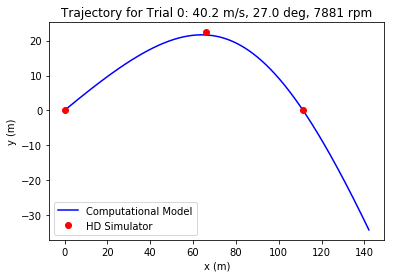

model apex (x,y) = ( 64.0151270763 ,  21.659417635 )m
model end (x,y) = ( 111.397513152 ,  -0.049302809988 )m


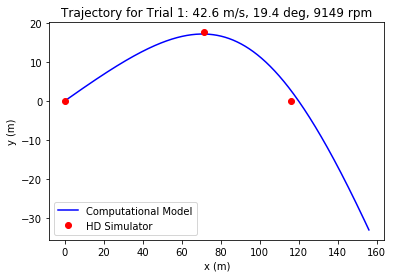

model apex (x,y) = ( 70.7419724032 ,  17.1496929421 )m
model end (x,y) = ( 120.002078185 ,  -0.0424839034413 )m


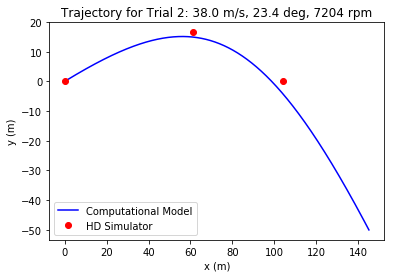

model apex (x,y) = ( 56.0746745429 ,  15.1620598129 )m
model end (x,y) = ( 98.6717297826 ,  0.0268156539009 )m


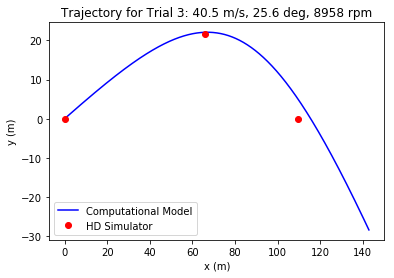

model apex (x,y) = ( 66.9978389704 ,  22.1065054193 )m
model end (x,y) = ( 115.461433722 ,  0.0384556713595 )m


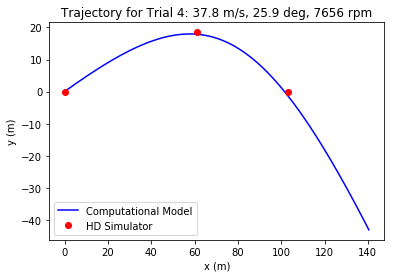

model apex (x,y) = ( 57.8448105898 ,  17.9679495966 )m
model end (x,y) = ( 101.580327907 ,  -0.0436959285638 )m


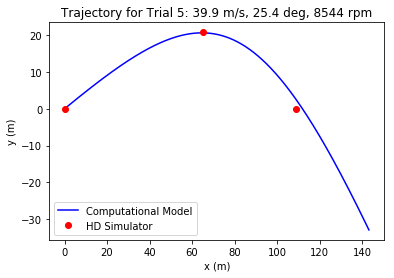

model apex (x,y) = ( 64.6267756671 ,  20.6378228176 )m
model end (x,y) = ( 111.965420868 ,  -0.0453827937285 )m


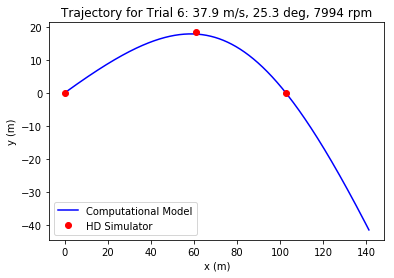

model apex (x,y) = ( 58.562707089 ,  17.8968581549 )m
model end (x,y) = ( 102.67962127 ,  0.0102390094301 )m


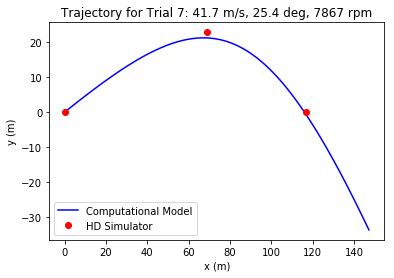

model apex (x,y) = ( 67.1791525496 ,  21.2914923339 )m
model end (x,y) = ( 115.92129004 ,  0.0300448497269 )m


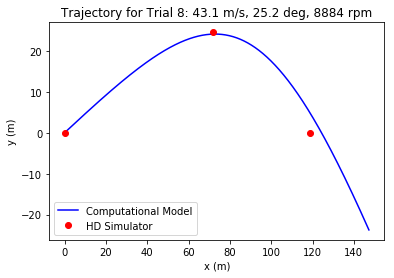

model apex (x,y) = ( 72.8165642651 ,  24.1545436768 )m
model end (x,y) = ( 124.389473238 ,  -0.0388510367092 )m


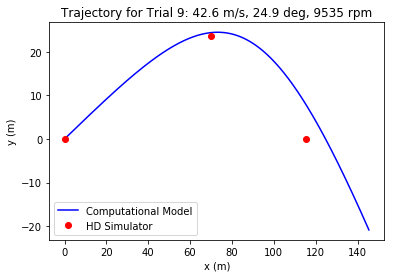

model apex (x,y) = ( 73.1361575439 ,  24.4799690389 )m
model end (x,y) = ( 124.681140726 ,  0.0246799630489 )m


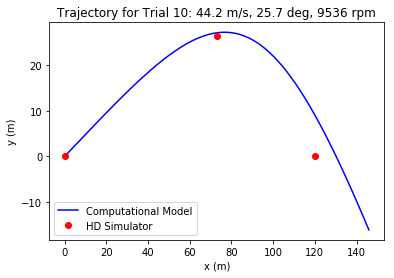

model apex (x,y) = ( 76.634774489 ,  27.2019853975 )m
model end (x,y) = ( 130.219575665 ,  -0.00728924614559 )m


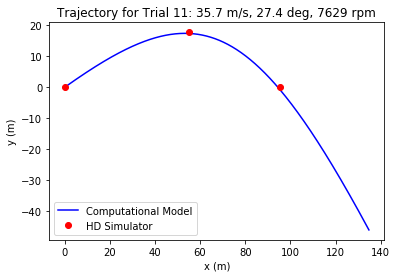

model apex (x,y) = ( 53.2088709306 ,  17.4425290426 )m
model end (x,y) = ( 94.4364159692 ,  0.0380092670106 )m


In [7]:
#loop through all rows

for row in range(0,rows):
    df_row=df.iloc[row]
    
    #data for HD Golf trajectory
    x_carry = df_row['Carry (m)']
    x_apex = df_row['X Peak Point (m)']
    y_apex = df_row['Y Peak Point (m)']

    x_hdgolf = [0, x_apex, x_carry]
    y_hdgolf = [0, y_apex, 0]    
    
    #initial conditions for the ball
    launch_angle = df_row['Launch Angle (deg)'] * np.pi/180 #radians
    launch_speed = df_row['Ball Speed (m/s)'] #m/s
    rpm = df_row['Spin (rpm)'] #rev per minute 
    spinrate = rpm /60 *2* np.pi
    params[7]=spinrate #this variable is kept in the parameters list
    
    # trajectory data array: [x,vx,y,vy]
    r0 = np.zeros(4) #four columns of data

    #Define initial positions and velocity
    r0[0] = 0 # x(0)
    r0[1] = launch_speed*np.cos(launch_angle) # vx(0)
    r0[2] = 0 # y(0)
    r0[3] = launch_speed*np.sin(launch_angle) # vy(0)

    #Solve the DE using RK4
    t_array = np.linspace(0., 7, 1000)
    r = spi.odeint(f, r0, t_array,args=(params,))
    
    #plot graph of x vs. y position 
    plt.title("Trajectory for Trial %i: %.1f m/s, %.1f deg, %.0f rpm" % (row, launch_speed, launch_angle/np.pi*180, rpm))
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    #for the trajectory, plot the first and third columns: r = [x,vx,y,vy]
    plt.plot(r[:,0],r[:,2],'b-', label='Computational Model')
    #plot points for HD Golf results
    plt.plot(x_hdgolf,y_hdgolf,'ro', label='HD Simulator')
    plt.legend(loc='best')
    plt.show()
    
    y_apex=np.max(r[:,2]) #y value of peak
    apex_index, = np.where(r[:,2] == y_apex)
    x_apex = r[:,0][int(apex_index)]
    print("model apex (x,y) = (", x_apex, ", ", y_apex, ")m")
    
    y_no_initial=np.delete(r[:,2], 0) #array without the initial values
    abs_y=np.abs(y_no_initial) # |y| so negative values will be positive
    index_ground=np.argmin(abs_y) #index of array when |y| is a min (at ground)
    carry=r[:,0][index_ground+1] #x value when projectile hits the ground
    x_end=carry
    y_end=r[:,2][index_ground+1] #y value when projectile hits the ground
    print("model end (x,y) = (", x_end, ", ", y_end, ")m")



    #Difference of peak point between HD and model 
#    dPeak_sq = (x_apex - )**2 + (y_apex - )**2
    
    #Difference of end point between HD and model 
#    dEnd_sq = (x_carry - )**2 + ()

